## BUSSINES UNDERSTANDING

# Pada tahap ini bertujuan untuk memahami masalah bisnis dengan cara bagaimana meningkatkan akurasi prediksi tentang suatu penyakit yaitu diabetes agar dapat memberikan informasi yang lebih akurat bagi pihak rumah sakit maupun pasien dalam pengambilan keputusan.

## Menentukan liblary yang akan digunakan

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

## DARA UNDERSTANDING

## Data set ini memiliki 8 atribut, yaitu sebagai berikut:
1. gender : jenis kelamin
2. age : umur
3. hypertension : tekanan darah
4. heart_disease : penyakit jantung
5. smoking : riwayat perokok pasien
6. bmi : berat bdan ideal
7. HbA1c_level : kadar gula darah
8. blood_glucosa_level : tingkat gula darah

## DATA PREPARATION

In [20]:
diabetes_data = pd.read_csv('diabetes.csv')


In [21]:
diabetes_data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [22]:
diabetes_data=diabetes_data.replace(['never','No Info','current','former','not current', 'Other','ever'],(0, 1, 2, 3, 4, 5, 6))
diabetes_data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,0,25.19,6.6,140,0
1,Female,54.0,0,0,1,27.32,6.6,80,0
2,Male,28.0,0,0,0,27.32,5.7,158,0
3,Female,36.0,0,0,2,23.45,5.0,155,0
4,Male,76.0,1,1,2,20.14,4.8,155,0


In [23]:
diabetes_data=diabetes_data.replace(['Female','Male'],(0,1))
diabetes_data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,1,27.32,6.6,80,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,2,23.45,5.0,155,0
4,1,76.0,1,1,2,20.14,4.8,155,0


<Axes: >

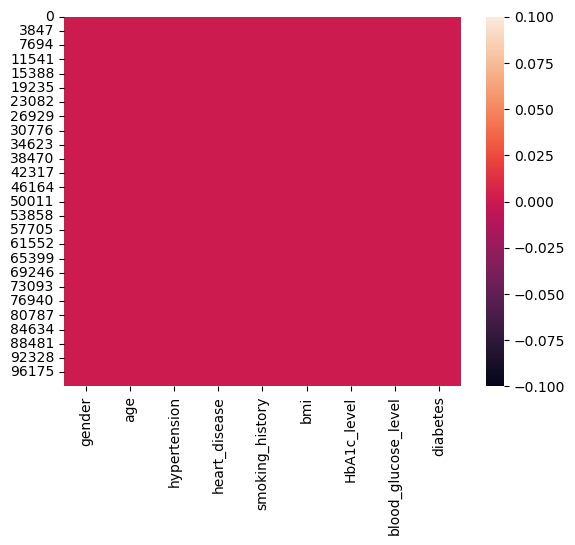

In [24]:
sns.heatmap(diabetes_data.isnull())

<Axes: >

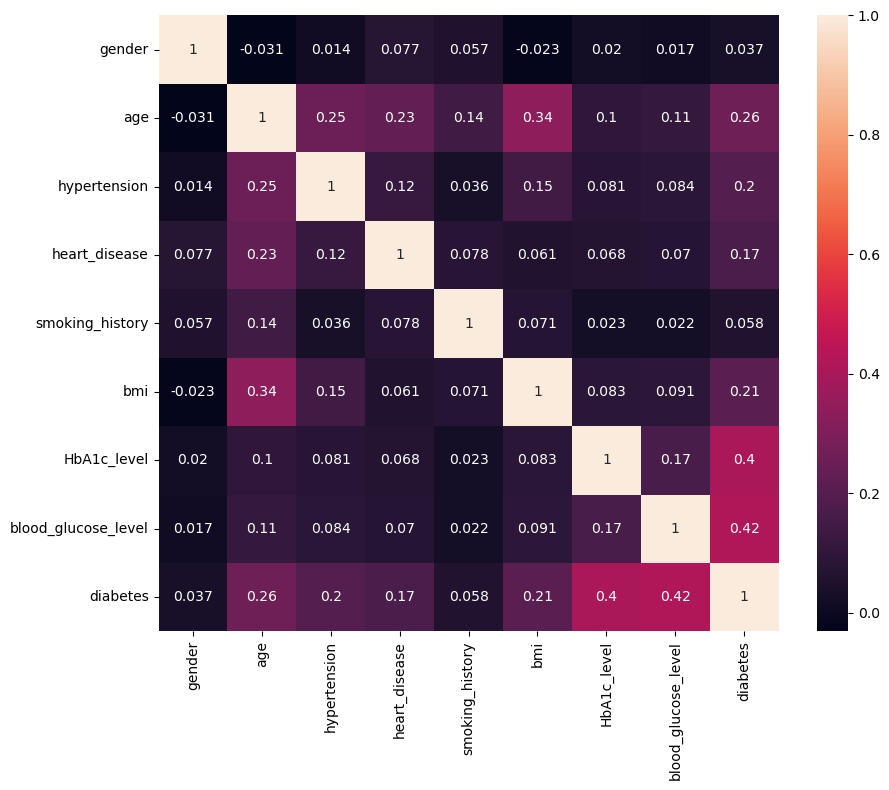

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(diabetes_data.corr(),annot=True)

## MODELING DATA

## Pisahkan data atribut dengan label

In [26]:
x = diabetes_data.drop(columns='diabetes', axis=1)
y = diabetes_data['diabetes']

In [27]:
print(x)

       gender   age  hypertension  heart_disease  smoking_history    bmi  \
0           0  80.0             0              1                0  25.19   
1           0  54.0             0              0                1  27.32   
2           1  28.0             0              0                0  27.32   
3           0  36.0             0              0                2  23.45   
4           1  76.0             1              1                2  20.14   
...       ...   ...           ...            ...              ...    ...   
99995       0  80.0             0              0                1  27.32   
99996       0   2.0             0              0                1  17.37   
99997       1  66.0             0              0                3  27.83   
99998       0  24.0             0              0                0  35.42   
99999       0  57.0             0              0                2  22.43   

       HbA1c_level  blood_glucose_level  
0              6.6                  140  
1  

In [28]:
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64


## Pisahkan data training dan data testing

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state= 2)

In [30]:
print(x.shape, x_train.shape, x_test.shape)

(100000, 8) (80000, 8) (20000, 8)


## Membuat model training

In [31]:
model = LogisticRegression()

In [32]:
model.fit(x_train, y_train)

c:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## EVALUASI MODEL

In [33]:
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score (x_train_prediction, y_train)

In [35]:
print('Akurasi Data Testing : ', training_data_accuracy)

Akurasi Data Testing :  0.9581125


In [36]:
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [37]:
print('Akurasi Data Testing :', test_data_accuracy)

Akurasi Data Testing : 0.9584


## Buatkan Model Data Prediksi

In [38]:
input_data = (0, 80.0, 0, 0, 0, 25.19, 6.6, 140)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
    print('Pasien Tidak Mengidap Penyakit Diabetes')
else :
    print('Pasien Mengidap Penyakit Diabetes')

[0]
Pasien Tidak Mengidap Penyakit Diabetes


c:\Users\asus\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [40]:
input_data = (1, 67.0, 0, 1, 4, 27.32, 6.5, 200)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
    print('Pasien Tidak Mengidap Penyakit Diabetes')
else :
    print('Pasien Mengidap Penyakit Diabetes')

[1]
Pasien Mengidap Penyakit Diabetes


c:\Users\asus\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## DEPLOYMENT

## Simpan Model

In [41]:
import pickle

In [45]:
filename ='Diabates.sav'
pickle.dump(model, open(filename, 'wb'))